In [2]:
import pandas as pd

df_property = pd.read_csv('property_listing_data_in_Bangladesh.csv')
df_property

,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50 Thousand
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30 Thousand
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30 Thousand
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35 Thousand
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25 Thousand
...,...,...,...,...,...,...,...,...,...,...,...
7552,"Picture Yourself, Residing In This Well Constr...",4,4,"3,600 sqft","Sector 3, Uttara, Dhaka",Duplex,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"February 7, 2023",80 Thousand
7553,Flat For Rent In Uttara Sector 13 Near Lubana ...,3,2,900 sqft,"Sector 13, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"February 9, 2022",19 Thousand
7554,1000 SQ FT flat for rent in Uttara Sector 13 n...,2,2,"1,000 sqft","Sector 13, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/12...,https://www.bproperty.com/en/property/details-...,"February 14, 2022",22 Thousand
7555,Well Planned Apartment For Rent In Gulshan 1 N...,3,4,"3,600 sqft","Gulshan 1, Gulshan, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/30...,https://www.bproperty.com/en/property/details-...,"February 7, 2023",1.75 Lakh


In [3]:
df_property.isnull().sum()


title          0
beds           0
bath           0
area           0
adress         0
type           0
purpose        0
flooPlan       1
url            0
lastUpdated    0
price          0
dtype: int64

In [4]:
df_property['area'] = df_property['area'].str.replace('sqft', '').str.replace(',', '').astype(int)
df_property['area']

0       2200
1       1400
2       1950
3       2000
4       1650
        ... 
7552    3600
7553     900
7554    1000
7555    3600
7556    2600
Name: area, Length: 7557, dtype: int32

In [5]:
df_property['price'] = df_property['price'].apply(lambda x: int(float(x.split(' ')[0])*(1000 if 'Thousand' in x else 100000 if 'Lakh' else 1)))
df_property['price']

0        50000
1        30000
2        30000
3        35000
4        25000
         ...  
7552     80000
7553     19000
7554     22000
7555    175000
7556     90000
Name: price, Length: 7557, dtype: int64

In [6]:
df_property['beds'] = df_property['beds'].str.replace('Bed', '').astype(int)
df_property['beds']

0       3
1       3
2       3
3       3
4       3
       ..
7552    4
7553    3
7554    2
7555    3
7556    4
Name: beds, Length: 7557, dtype: int32

In [7]:
df_property['bath'] = df_property['bath'].str.replace('Bath', '').astype(int)
df_property['bath']

0       4
1       4
2       4
3       3
4       4
       ..
7552    4
7553    2
7554    2
7555    4
7556    4
Name: bath, Length: 7557, dtype: int32

In [8]:
df_property['neighborhood'] = df_property['adress'].apply(lambda x: x.split(',')[-2].strip() if len(x.split(',')) >= 2 else "Unknown")
df_property

,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price,neighborhood
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,2200,"Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50000,Bashundhara R-A
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,1400,"South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30000,Khulshi
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,1950,"Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30000,Bashundhara R-A
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,2000,"Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35000,Uttara
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,1650,"Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25000,Bashundhara R-A
...,...,...,...,...,...,...,...,...,...,...,...,...
7552,"Picture Yourself, Residing In This Well Constr...",4,4,3600,"Sector 3, Uttara, Dhaka",Duplex,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"February 7, 2023",80000,Uttara
7553,Flat For Rent In Uttara Sector 13 Near Lubana ...,3,2,900,"Sector 13, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"February 9, 2022",19000,Uttara
7554,1000 SQ FT flat for rent in Uttara Sector 13 n...,2,2,1000,"Sector 13, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/12...,https://www.bproperty.com/en/property/details-...,"February 14, 2022",22000,Uttara
7555,Well Planned Apartment For Rent In Gulshan 1 N...,3,4,3600,"Gulshan 1, Gulshan, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/30...,https://www.bproperty.com/en/property/details-...,"February 7, 2023",175000,Gulshan


In [9]:
df_property['city'] = df_property['adress'].apply(lambda x: x.split(',')[-1].strip())
df_property = df_property[df_property['city']!='Chattogram']
df_property

,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price,neighborhood,city
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,2200,"Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50000,Bashundhara R-A,Dhaka
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,1950,"Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30000,Bashundhara R-A,Dhaka
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,2000,"Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35000,Uttara,Dhaka
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,1650,"Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25000,Bashundhara R-A,Dhaka
5,"A nice residential flat of 3400 SQ FT, for ren...",5,5,3400,"Gulshan 1, Gulshan, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"February 14, 2023",110000,Gulshan,Dhaka
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7552,"Picture Yourself, Residing In This Well Constr...",4,4,3600,"Sector 3, Uttara, Dhaka",Duplex,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"February 7, 2023",80000,Uttara,Dhaka
7553,Flat For Rent In Uttara Sector 13 Near Lubana ...,3,2,900,"Sector 13, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"February 9, 2022",19000,Uttara,Dhaka
7554,1000 SQ FT flat for rent in Uttara Sector 13 n...,2,2,1000,"Sector 13, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/12...,https://www.bproperty.com/en/property/details-...,"February 14, 2022",22000,Uttara,Dhaka
7555,Well Planned Apartment For Rent In Gulshan 1 N...,3,4,3600,"Gulshan 1, Gulshan, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/30...,https://www.bproperty.com/en/property/details-...,"February 7, 2023",175000,Gulshan,Dhaka


In [10]:
df_cleaned = df_property[['beds', 'bath', 'area', 'neighborhood', 'price']].copy()
df_cleaned

,beds,bath,area,neighborhood,price
0,3,4,2200,Bashundhara R-A,50000
2,3,4,1950,Bashundhara R-A,30000
3,3,3,2000,Uttara,35000
4,3,4,1650,Bashundhara R-A,25000
5,5,5,3400,Gulshan,110000
...,...,...,...,...,...
7552,4,4,3600,Uttara,80000
7553,3,2,900,Uttara,19000
7554,2,2,1000,Uttara,22000
7555,3,4,3600,Gulshan,175000


In [11]:
top_areas = df_cleaned['neighborhood'].value_counts().nlargest(30).index
df_cleaned['neighborhood'] = df_cleaned['neighborhood'].apply(lambda x: x if x in top_areas else 'Other')
df_cleaned

,beds,bath,area,neighborhood,price
0,3,4,2200,Bashundhara R-A,50000
2,3,4,1950,Bashundhara R-A,30000
3,3,3,2000,Uttara,35000
4,3,4,1650,Bashundhara R-A,25000
5,5,5,3400,Gulshan,110000
...,...,...,...,...,...
7552,4,4,3600,Uttara,80000
7553,3,2,900,Uttara,19000
7554,2,2,1000,Uttara,22000
7555,3,4,3600,Gulshan,175000


In [ ]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['neighborhood'], drop_first=True)
df_cleaned

KeyError: "None of [Index(['neighborhood'], dtype='object')] are in the [columns]"

In [13]:
from sklearn.model_selection import train_test_split

X = df_cleaned[['beds', 'bath', 'area'] + [col for col in df_cleaned.columns if col.startswith('neighborhood_')]]
y = df_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1309302947.0578017
R-squared: 0.8806842143791195


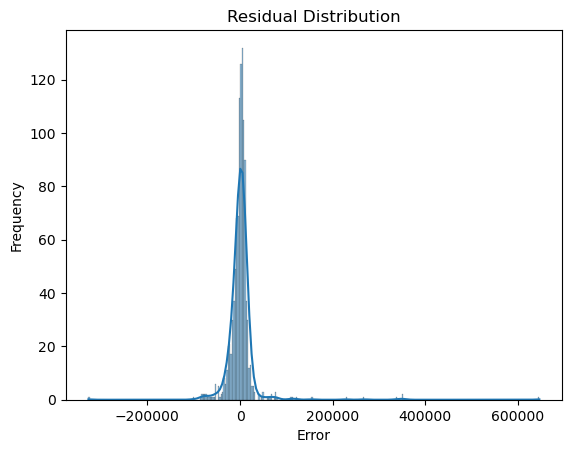

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


In [16]:
import joblib

# Save model
joblib.dump(model, "house_price_model.pkl")


['house_price_model.pkl']

In [22]:
loc_list = df_cleaned.columns.map(lambda x: x.replace("neighborhood_", ""))
loc_list

Index(['beds', 'bath', 'area', 'price', 'Aftab Nagar', 'Agargaon', 'Badda',
       'Banani', 'Banasree', 'Baridhara', 'Baridhara DOHS', 'Bashundhara R-A',
       'Cantonment', 'Dakshin Khan', 'Dhanmondi', 'Eskaton', 'Gulshan',
       'Hazaribag', 'Ibrahimpur', 'Khilgaon', 'Khilkhet', 'Lalbagh',
       'Maghbazar', 'Mirpur', 'Mohammadpur', 'Motijheel', 'Nikunja', 'Other',
       'Rampura', 'Shyamoli', 'Tejgaon', 'Turag', 'Uttar Khan', 'Uttara'],
      dtype='object')